In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

### OSMEN Pipeline

In [2]:
# loading the data
pima = pd.read_csv('diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# we need to convert zeros in following columns [golucose , bloodpressure , skinthickness , insulin , BMI] into NaN
# first we make a copy of data
pima_copy = pima.copy()

In [6]:
pima_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
pima_copy[['Glucose','BloodPressure','SkinThickness','Insulin' , 'BMI']]=\
pima_copy[['Glucose','BloodPressure','SkinThickness','Insulin' , 'BMI']].replace(0,np.NaN)

print(pima_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### Before filling null we need to understand the data distribution 

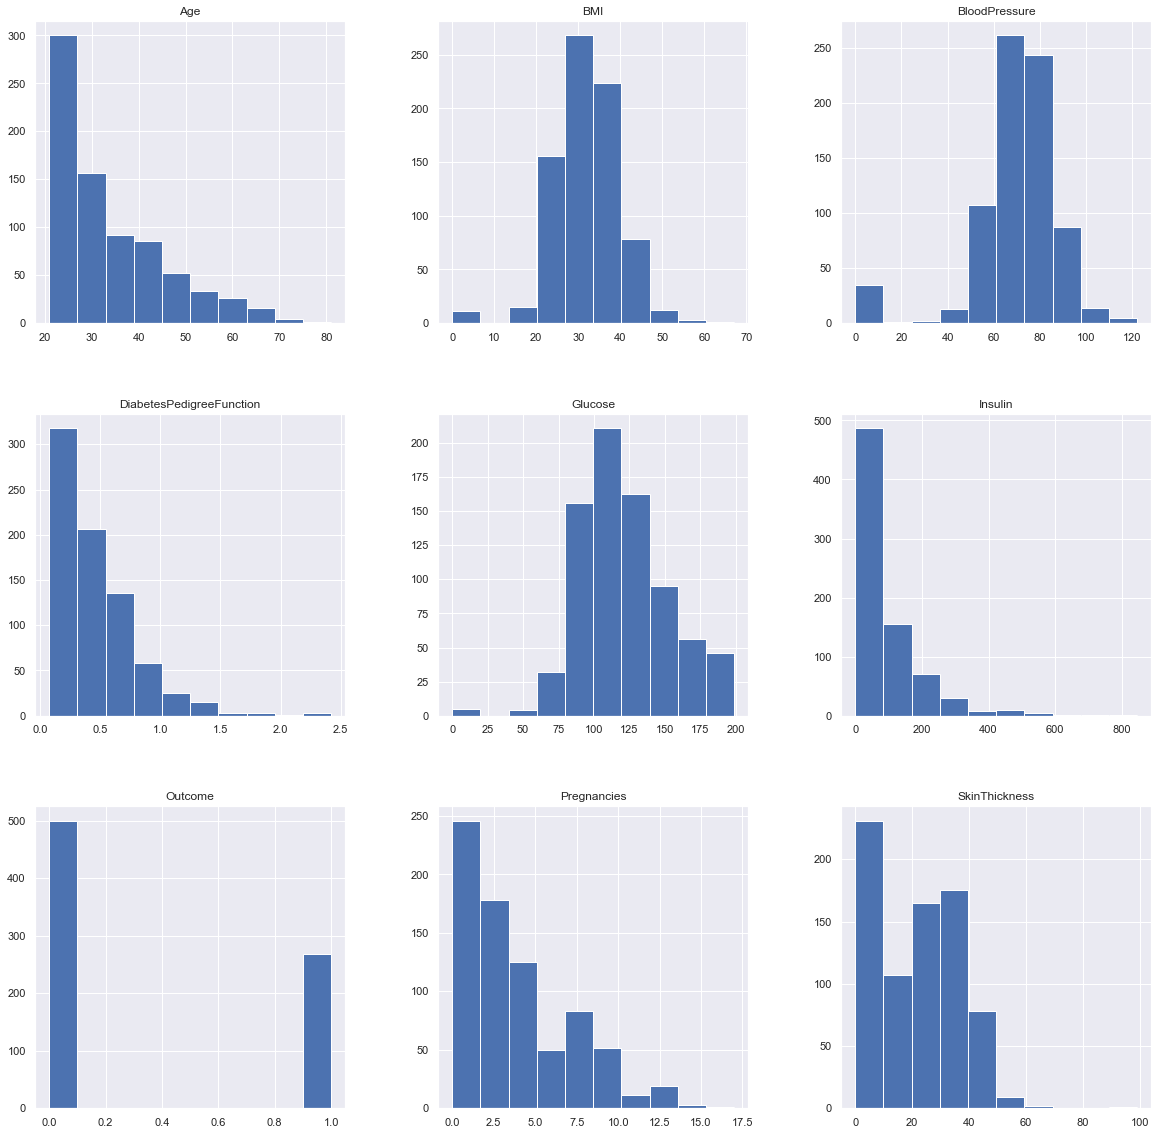

In [8]:
# before replacing zeros
pima.hist(figsize=(20 , 20))
plt.show()

In [9]:
pima_copy['Glucose'].fillna(pima_copy['Glucose'].mean(), inplace=True)
pima_copy['BloodPressure'].fillna(pima_copy['BloodPressure'].mean(), inplace =True)
pima_copy['SkinThickness'].fillna(pima_copy['SkinThickness'].median() , inplace = True)
pima_copy['Insulin'].fillna(pima_copy['Insulin'].median() , inplace = True)
pima_copy ['BMI'].fillna(pima_copy ['BMI'].mean(), inplace=True)

In [10]:
pima_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

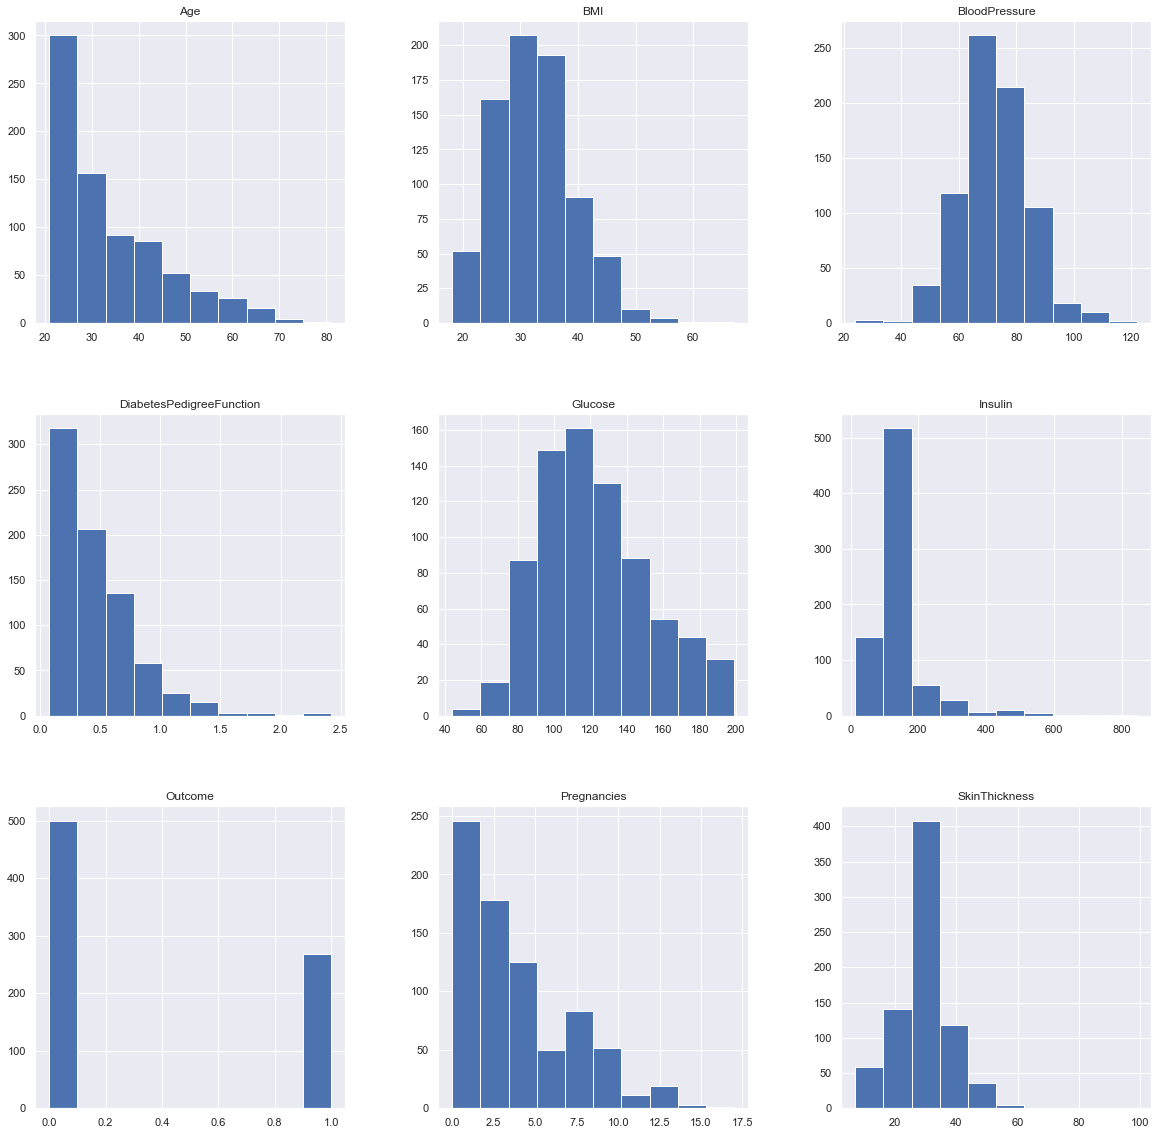

In [11]:
# plotting after cleaning
pima_copy.hist(figsize=(20,20))
plt.show()

In [12]:
pima_copy.shape

(768, 9)

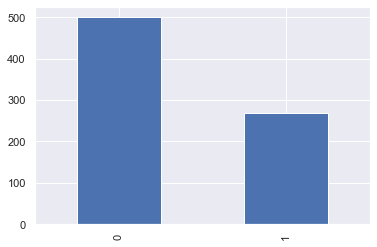

In [13]:
#chicking for the balance of the data
pima.Outcome.value_counts().plot(kind='bar')




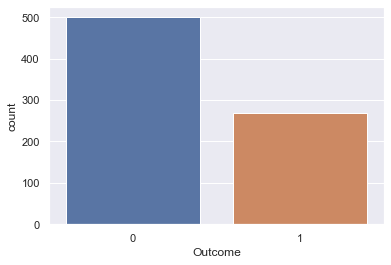

In [14]:
# another method
sns.countplot(x = 'Outcome' , data=pima)

### previuse chart means that patients number with no diabetes (0) is bigger than patients with diabetes (1)

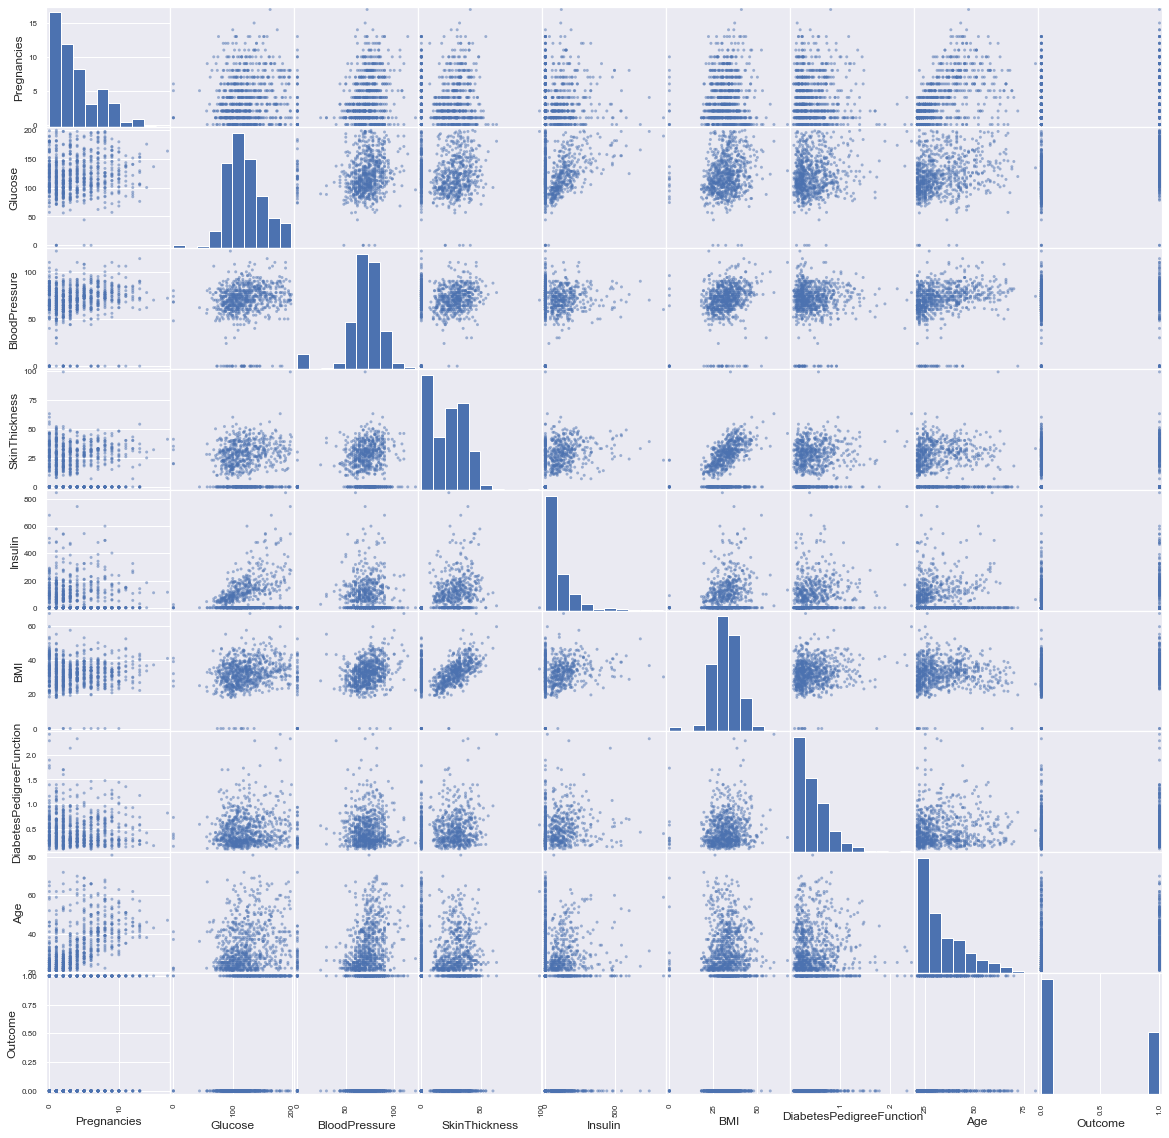

In [15]:
#scatter plot for uncleaned data
from pandas.plotting import scatter_matrix
scatter_matrix(pima, figsize=(20, 20))
plt.show()

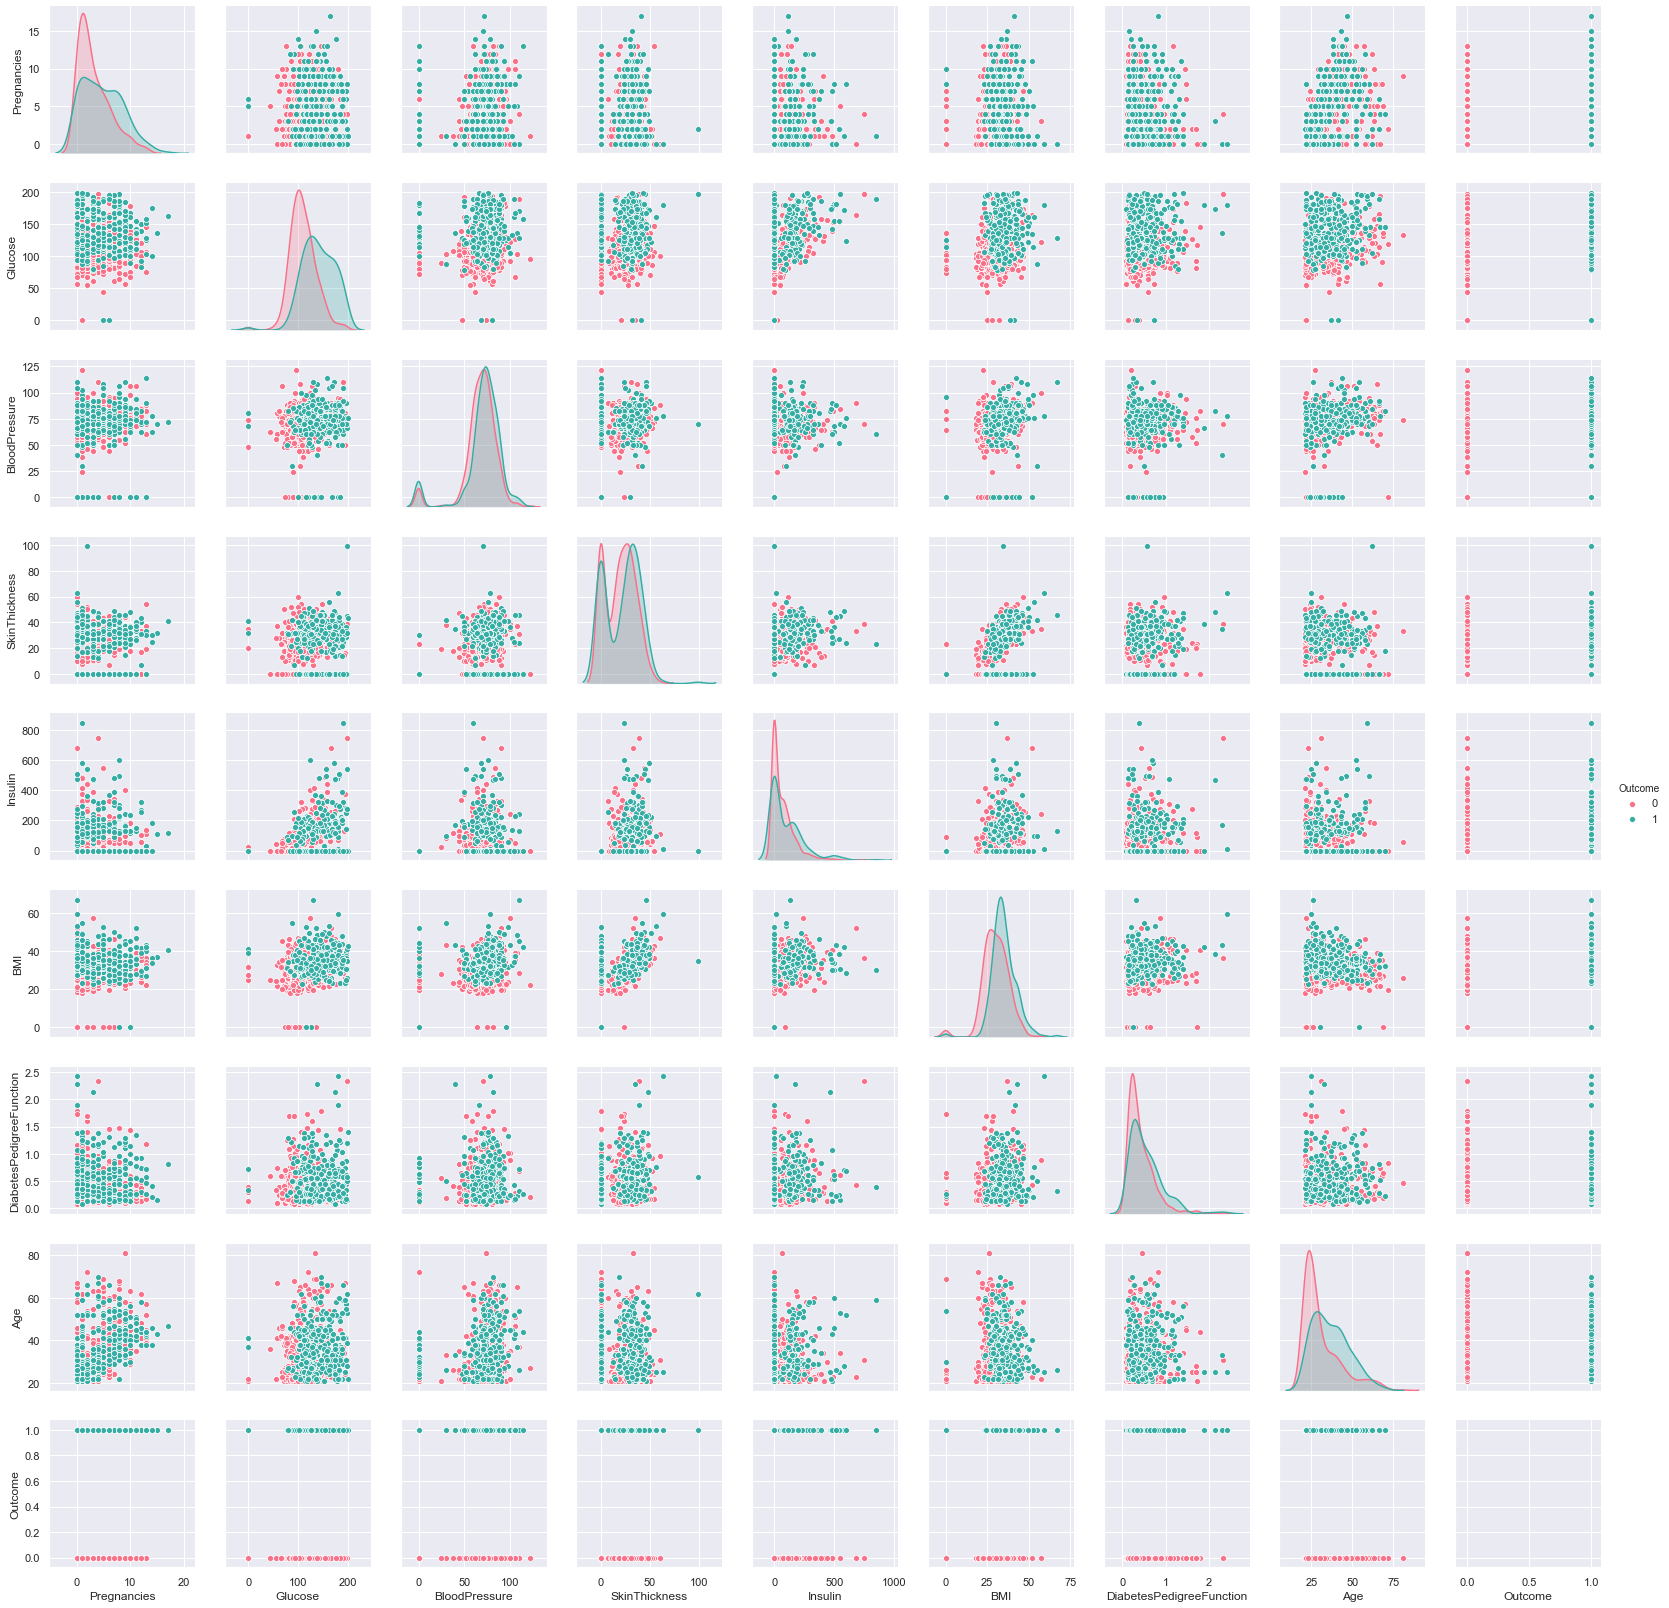

In [16]:
# suing seaborn
sns.pairplot(pima , hue = 'Outcome',palette="husl")


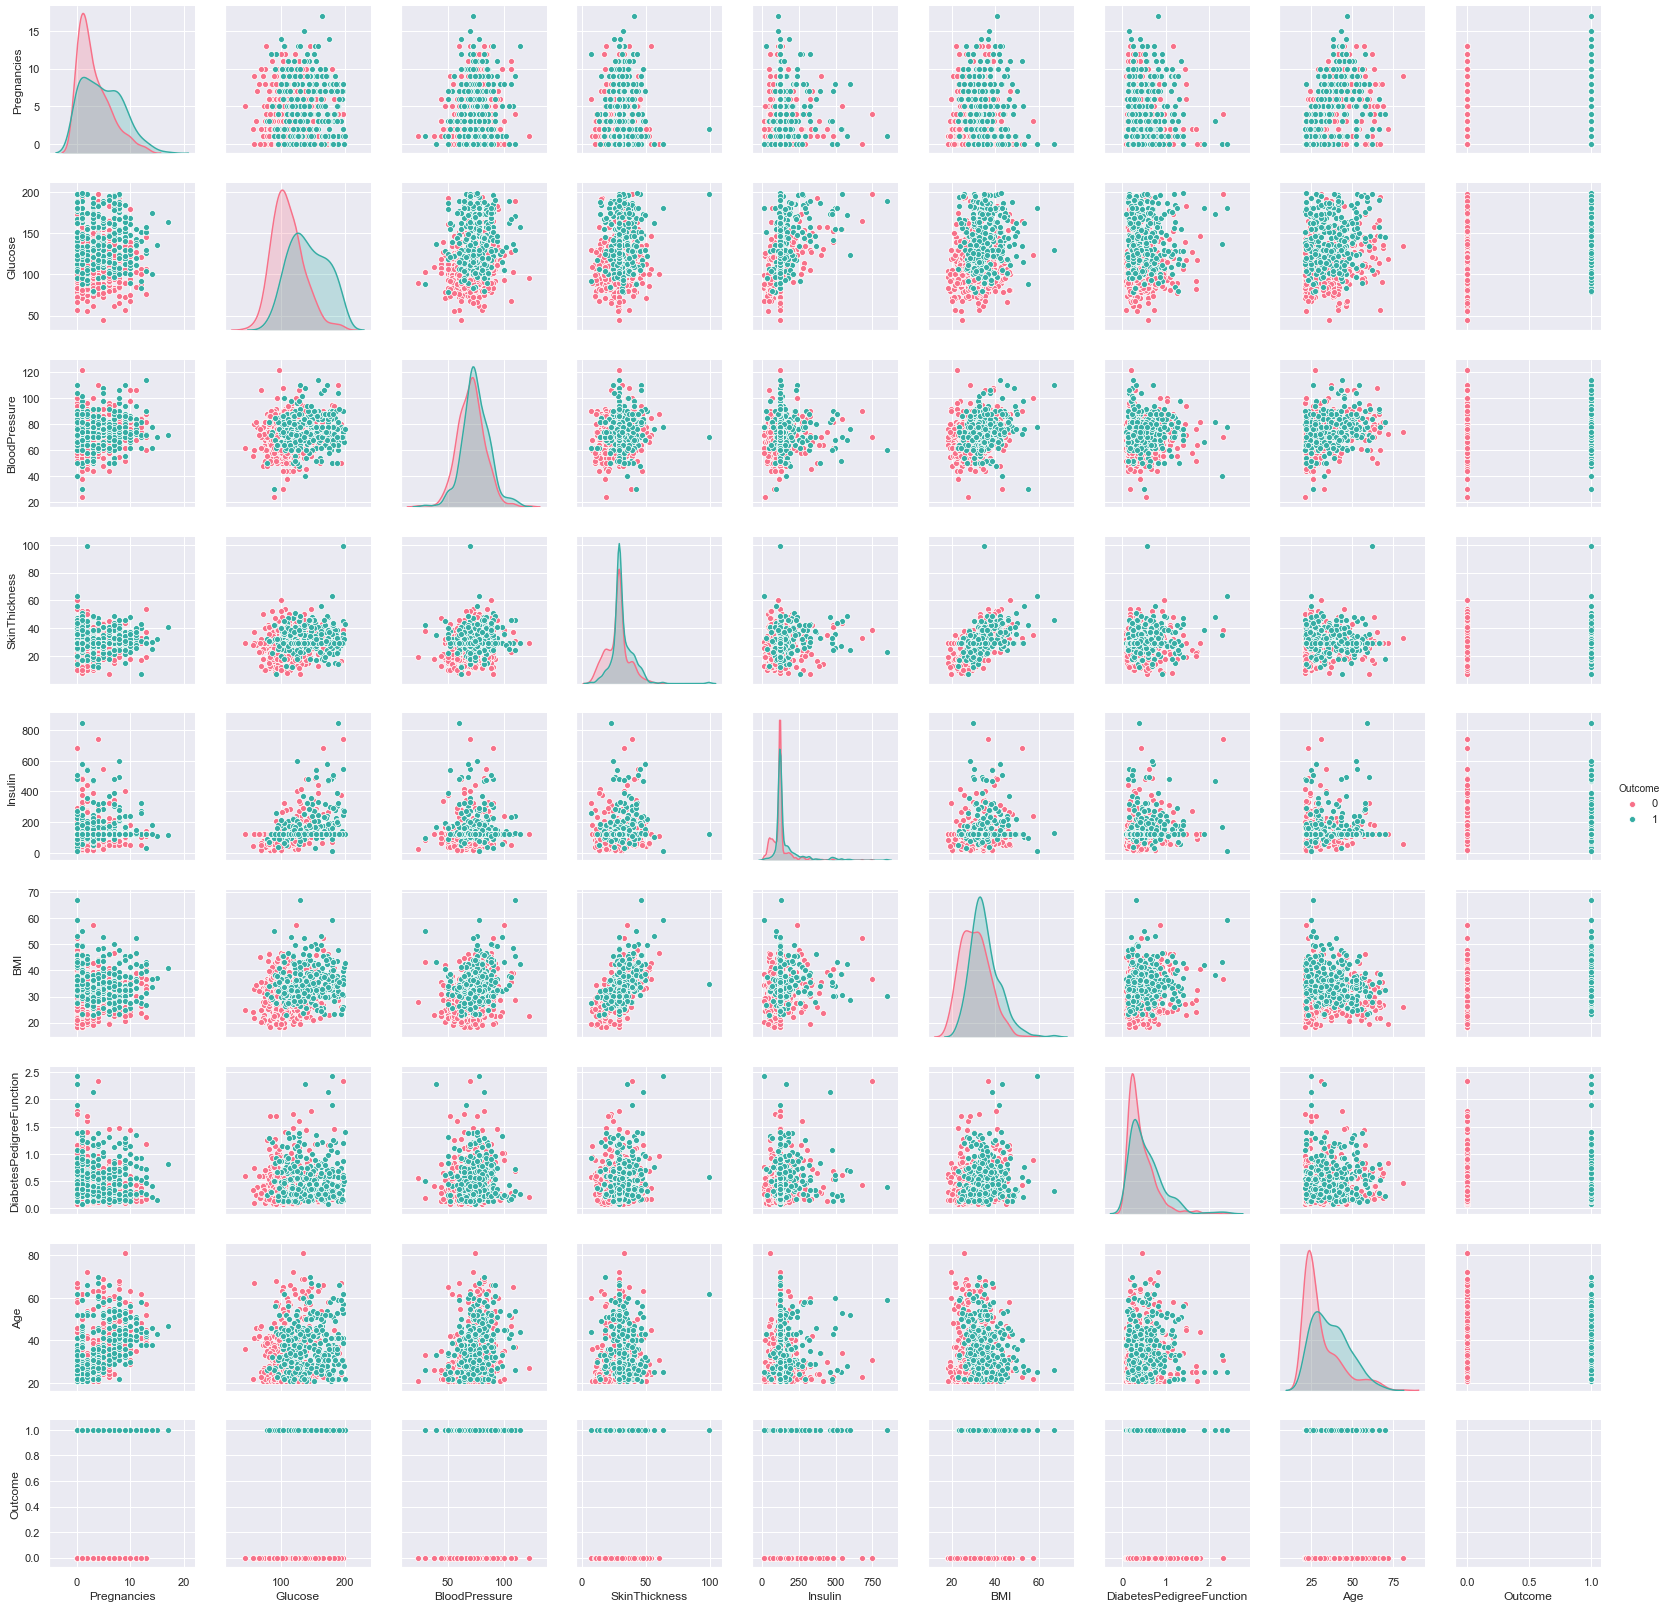

In [17]:
# plotting for cleand data
sns.pairplot(pima_copy ,hue='Outcome',palette="husl" )

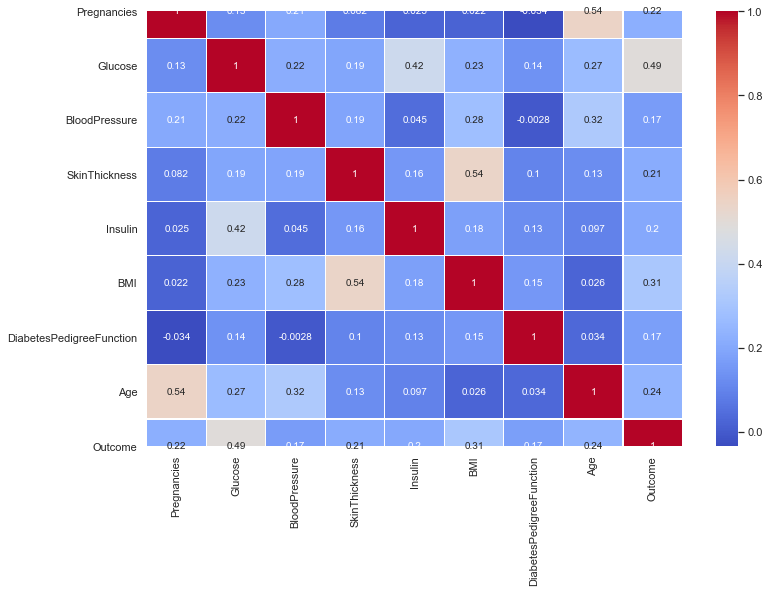

In [30]:
# corr plotting for cleaned data
plt.figure(figsize = (12 , 8))
sns.heatmap(pima_copy.corr() , annot = True , cmap='coolwarm' , linewidths= .1)

### Scaling the data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(pima_copy.drop(['Outcome'],axis=1),),\
                 columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       '          BMI', 'DiabetesPedigreeFunction', 'Age'])

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [21]:
y = pima_copy.Outcome

### Test train split and cross validation methods

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X , y ,test_size=.3 , random_state=42 , stratify = y )


In [23]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1 , 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train , y_train)
    
    train_scores.append(knn.score(X_train , y_train))
    test_scores.append(knn.score(X_test,y_test))

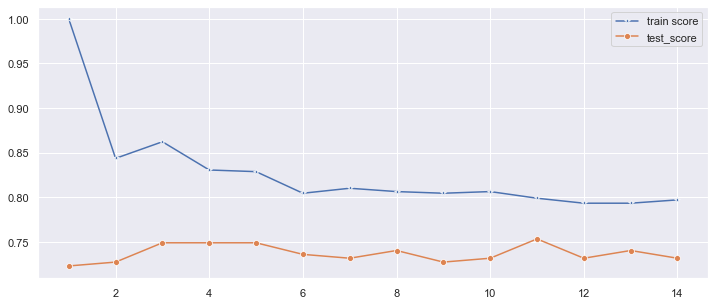

In [24]:
plt.figure(figsize=(12 , 5))
sns.lineplot(range(1 , 15),train_scores ,marker='*', label = ('train score'))
sns.lineplot(range(1 , 15) , test_scores ,marker = 'o' ,label = ('test_score') )

### best resultes where at k = 11 therefor we will use it in the final model

In [34]:
knn = KNeighborsClassifier(11)
knn.fit(X_train ,y_train)
knn.score(X_test , y_test)

0.7532467532467533

## Model Performance Analysis


In [35]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test , y_pred)
pd.crosstab(y_test , y_pred,rownames = ["True"] , colnames=['Predicted'],margins = True )

Predicted,0,1,All
True,,,
0,127,23,150
1,34,47,81
All,161,70,231


## Classification Report

In [36]:
# import classifiection report
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

